# Customer Churn EDA
**Author**: Muhammad Ali Syed  
**Date**: 02/08/2025
**Purpose**: Initial data exploration for churn prediction model

## Business Context
Marketing needs to identify customers likely to churn within 30 days for retention campaigns.


In [60]:
# Industry practice: Consistent imports at the top
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Our project modules
from src.config import RAW_DATA_PATH, RANDOM_SEED

# Configuration
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(RANDOM_SEED)


## 1. Data Loading and Initial Inspection

In [61]:
# Load data with error handling
data_path = RAW_DATA_PATH / "WA_Fn-UseC_-Telco-Customer-Churn.csv"

try:
    df = pd.read_csv(data_path)
    print(f"✓ Data loaded successfully: {df.shape[0]:,} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("✗ Data file not found. Please run: python src/data_downloader.py")
    raise


✓ Data loaded successfully: 7,043 rows, 21 columns


## Data Overview

In [62]:
print("=== Data Overview ===")
print(f"Shape: {df.shape}")
print(f"\nColumn Types:\n{df.dtypes.value_counts()}")
print(f"\nTarget:\n{df['Churn'].value_counts()}")
print(f"\nTarget Distribution:\n{df['Churn'].value_counts(normalize=True)}")

=== Data Overview ===
Shape: (7043, 21)

Column Types:
object     18
int64       2
float64     1
Name: count, dtype: int64

Target:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Target Distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


## Missing Values Analysis

In [63]:
missing = df.isnull().sum()
if missing.sum() > 0:
    print("\nColumns with missing values: ")
    print(missing[missing > 0])
print("\nNo missing values")


No missing values


## Business-Relevant Questions

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


What's the average tenure of churned vs retained customers?

In [65]:
churned_tenure = df[df['Churn'] == 'Yes']['tenure'].mean()
not_churned_tenure = df[df['Churn'] == 'No']['tenure'].mean()

print(f"\nMean tenure of churned customers: {churned_tenure:.2f}")
print(f"\nMean tenure of customers that didnt churn: {not_churned_tenure:.2f}")


Mean tenure of churned customers: 17.98

Mean tenure of customers that didnt churn: 37.57


Is there a relationship between monthly charges and churn?

In [66]:
churned_monthly_charge = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
not_churned_monthly_charge = df[df['Churn'] == 'No']['MonthlyCharges'].mean()

print(f"\nMean Monthly charge for churned customers: {churned_monthly_charge:.2f}")
print(f"\nMean Monthly charge for not churned customers: {not_churned_monthly_charge:.2f}")


Mean Monthly charge for churned customers: 74.44

Mean Monthly charge for not churned customers: 61.27


Which services are churned customers most likely to have?

In [67]:
services_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
churned_df = df[df['Churn'] == 'Yes']
not_churned_df = df[df['Churn'] == 'No']

for cols in services_cols:
    print(f"\n===== {cols} =====")
    print(f"\nChurned: {churned_df[cols].value_counts(normalize=True)} \n\nNot Churned: {not_churned_df[cols].value_counts(normalize=True)}")


===== PhoneService =====

Churned: PhoneService
Yes    0.909042
No     0.090958
Name: proportion, dtype: float64 

Not Churned: PhoneService
Yes    0.901044
No     0.098956
Name: proportion, dtype: float64

===== MultipleLines =====

Churned: MultipleLines
Yes                 0.454789
No                  0.454254
No phone service    0.090958
Name: proportion, dtype: float64 

Not Churned: MultipleLines
No                  0.491109
Yes                 0.409934
No phone service    0.098956
Name: proportion, dtype: float64

===== InternetService =====

Churned: InternetService
Fiber optic    0.693954
DSL            0.245586
No             0.060460
Name: proportion, dtype: float64 

Not Churned: InternetService
DSL            0.379204
Fiber optic    0.347700
No             0.273096
Name: proportion, dtype: float64

===== OnlineSecurity =====

Churned: OnlineSecurity
No                     0.781701
Yes                    0.157838
No internet service    0.060460
Name: proportion, dtype: flo

Which payment method are churned customers most likel to use

In [68]:
churn_payment_method = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts(normalize=True)
not_churn_payment_method = df[df['Churn'] == 'No']['PaymentMethod'].value_counts(normalize=True)

print("\n ===== Churned Customers Payment methods =====")
print(churn_payment_method)

print("\n ===== Not Churned Customers Payment methods =====")
print(not_churn_payment_method)



 ===== Churned Customers Payment methods =====
PaymentMethod
Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: proportion, dtype: float64

 ===== Not Churned Customers Payment methods =====
PaymentMethod
Mailed check                 0.252029
Electronic check             0.250097
Credit card (automatic)      0.249324
Bank transfer (automatic)    0.248550
Name: proportion, dtype: float64


## Deeper tenure analysis

/var/folders/4c/4g9w277n1wb0ssy88bqbt6680000gn/T/ipykernel_72064/3409847904.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_bucket')['Churn'].apply(lambda x: (x == 'Yes').mean())


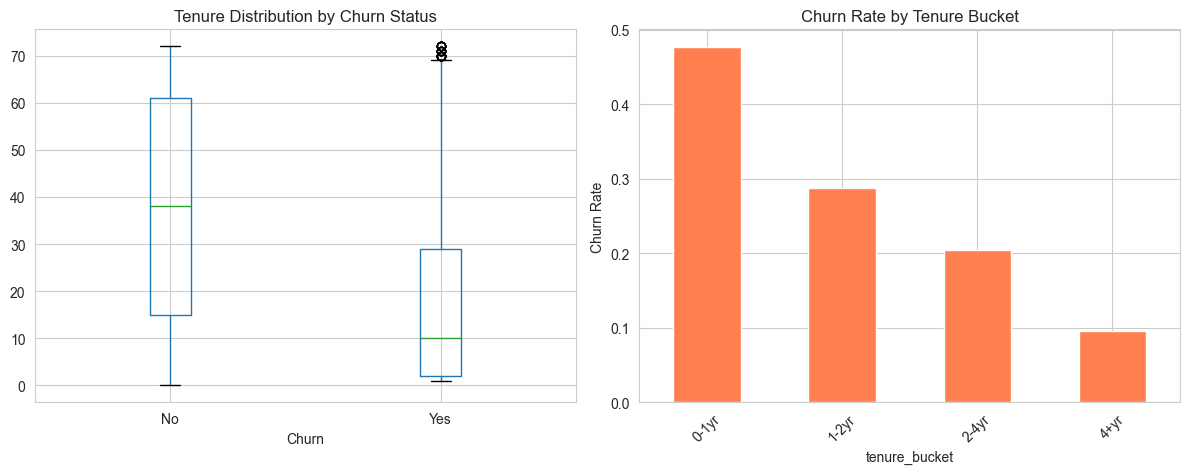

In [69]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df.boxplot(column='tenure', by='Churn', ax=plt.gca())
plt.title('Tenure Distribution by Churn Status')
plt.suptitle('')

plt.subplot(1, 2, 2)
# churn rate by tenure buckets
df['tenure_bucket'] = pd.cut(df['tenure'], 
                             bins=[0,12,24,48,72],
                             labels=['0-1yr', '1-2yr', '2-4yr', '4+yr'])
# group the df by tenure bucket, only looking at the churn, and get mean for each group
churn_by_tenure = df.groupby('tenure_bucket')['Churn'].apply(lambda x: (x == 'Yes').mean())
churn_by_tenure.plot(kind='bar', color='coral')
plt.title('Churn Rate by Tenure Bucket')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [70]:
print("Business Insight: Foccus retention programs on customers approaching 12-18 month mark")

Business Insight: Foccus retention programs on customers approaching 12-18 month mark


## The "Premium but Unprotected" segment analysis

In [71]:
# Create a flag for high risk customers
df['high_risk_profile'] = (
    (df['InternetService'] == 'Fiber optic') & 
    (df['OnlineSecurity'] == 'No') & 
    (df['OnlineBackup'] == 'No') & 
    (df['DeviceProtection'] == 'No') & 
    (df['TechSupport'] == 'No')
)

risk_churn = df.groupby('high_risk_profile')['Churn'].apply(lambda x: (x == 'Yes').mean())
print("Churn rate for high risk profile: ")
print(f"High risk customers: {risk_churn[True]:.1%}")
print(f"other customers: {risk_churn[False]:.1%}")

# How many customers are high risk of churning
print(f"\nSize of high risk segment: {df['high_risk_profile'].sum()} customers ({df['high_risk_profile'].mean():.1%})")

Churn rate for high risk profile: 
High risk customers: 63.6%
other customers: 21.5%

Size of high risk segment: 848 customers (12.0%)


## Payment Method segment analysis

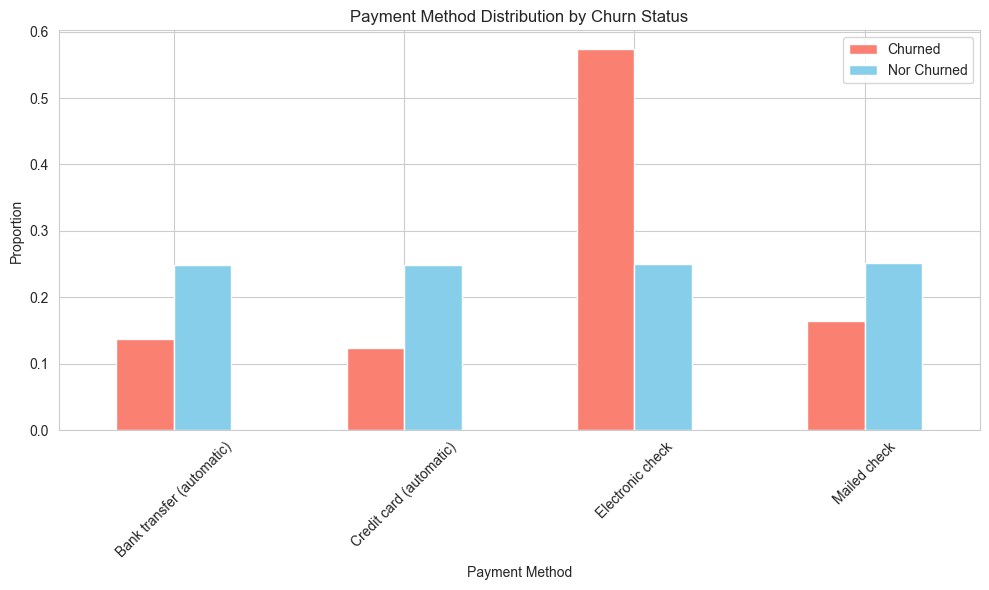

In [72]:
comparison_df = pd.DataFrame({
    'Churned': churn_payment_method,
    'Nor Churned': not_churn_payment_method
}).sort_index()

comparison_df.plot(kind='bar', figsize=(10,6), color=['salmon', 'skyblue'])
plt.title('Payment Method Distribution by Churn Status')
plt.ylabel('Proportion')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Revenue impact analysis 
Calculate monthly revenue loss from churn

In [73]:
churned_revenue = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
total_revenue = df['MonthlyCharges'].sum()
revenue_loss_pct = churned_revenue / total_revenue

print(f"Monthly revenue from churned customers: ${churned_revenue:,.2f}")
print(f"Revenue loss percentage: {revenue_loss_pct:.1%}")
print(f"Annualized revenue at risk: ${churned_revenue * 12:,.2f}")

# Which customers should we prioritize saving?
df['revenue_risk'] = df['MonthlyCharges'] * df['Churn'].map({'Yes': 1, 'No': 0})
top_risk = df.nlargest(100, 'revenue_risk')[['customerID', 'MonthlyCharges', 'tenure', 'Contract']]
print(f"\nTop 100 highest revenue risk customers represent ${top_risk['MonthlyCharges'].sum():,.2f}/month")

Monthly revenue from churned customers: $139,130.85
Revenue loss percentage: 30.5%
Annualized revenue at risk: $1,669,570.20

Top 100 highest revenue risk customers represent $10,875.90/month


In [74]:
print(df.dtypes)


customerID             object
gender                 object
SeniorCitizen           int64
Partner                object
Dependents             object
tenure                  int64
PhoneService           object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges           object
Churn                  object
tenure_bucket        category
high_risk_profile        bool
revenue_risk          float64
dtype: object


## Test feature_engineering.py

Make sure total charges are all ints so that errors dont pop up 

In [75]:
# Cell: Investigate the TotalCharges column
print("=== Investigating TotalCharges ===")
print(f"Data type: {df['TotalCharges'].dtype}")
print(f"Sample values:\n{df['TotalCharges'].head(10)}")

# Check for non-numeric values
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"\nRows with non-numeric TotalCharges: {len(non_numeric)}")
if len(non_numeric) > 0:
    print("Sample of problematic rows:")
    print(non_numeric[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

=== Investigating TotalCharges ===
Data type: object
Sample values:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

Rows with non-numeric TotalCharges: 11
Sample of problematic rows:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


In [78]:
# Cell: Test the fixed feature engineering
from src.feature_engineering import ChurnFeatureEngineer

# Reload the module to get the updated code
import importlib
import src.feature_engineering
importlib.reload(src.feature_engineering)
from src.feature_engineering import ChurnFeatureEngineer

fe = ChurnFeatureEngineer()
df_features = fe.fit_transform(df)

# Verify new features
print("✓ Feature engineering successful!")
print(f"\nNew features created:")
new_cols = [col for col in df_features.columns if col not in df.columns]
for col in new_cols:
    print(f"  - {col}")

# Check the data quality after transformation
print(f"\nData shape after feature engineering: {df_features.shape}")
print(f"Any nulls remaining: {df_features.isnull().sum().sum()}")

INFO:src.feature_engineering:Created 33 features


✓ Feature engineering successful!

New features created:
  - is_new_customer
  - tenure_squared
  - monthly_to_total_ratio
  - avg_charges_per_tenure
  - num_protection_services
  - has_premium_unprotected
  - contract_value_score
  - is_electronic_payment
  - revenue_per_service
  - high_value_customer

Data shape after feature engineering: (7043, 34)
Any nulls remaining: 0


In [79]:
# Cell: Investigate remaining nulls
print("=== Investigating Remaining Nulls ===")

# Which columns have nulls?
null_counts = df_features.isnull().sum()
null_cols = null_counts[null_counts > 0]
print("Columns with nulls:")
print(null_cols)

# Let's look at the specific rows with nulls
null_rows = df_features[df_features.isnull().any(axis=1)]
print(f"\nRows with nulls: {len(null_rows)}")

# Display key columns for these problematic rows
display_cols = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'tenure_bucket']
print("\nSample of problematic rows:")
print(null_rows[display_cols])

=== Investigating Remaining Nulls ===
Columns with nulls:
Series([], dtype: int64)

Rows with nulls: 0

Sample of problematic rows:
Empty DataFrame
Columns: [customerID, tenure, MonthlyCharges, TotalCharges, tenure_bucket]
Index: []


## Data Quality Report

In [80]:
def generate_data_quality_report(df):
    """Generate a comprehensive data quality report"""
    print("=== DATA QUALITY REPORT ===\n")
    
    # 1. Basic info
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB\n")
    
    # 2. Missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("Missing values:")
        print(missing[missing > 0])
        print()
    else:
        print("✓ No missing values\n")
    
    # 3. Data types
    print("Data types summary:")
    print(df.dtypes.value_counts())
    print()
    
    # 4. Numeric columns summary
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"Numeric columns ({len(numeric_cols)}):")
    for col in numeric_cols:
        print(f"  {col}: min={df[col].min():.2f}, max={df[col].max():.2f}, mean={df[col].mean():.2f}")
    
    # 5. Categorical columns summary
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    print(f"\nCategorical columns ({len(cat_cols)}):")
    for col in cat_cols:
        n_unique = df[col].nunique()
        print(f"  {col}: {n_unique} unique values")
    
    # 6. Target variable
    if 'Churn' in df.columns:
        print(f"\nTarget variable (Churn) distribution:")
        print(df['Churn'].value_counts())
        print(f"Churn rate: {(df['Churn'] == 'Yes').mean():.2%}")
    
    return True

# Run the report
generate_data_quality_report(df_features)

=== DATA QUALITY REPORT ===

Dataset shape: (7043, 34)
Memory usage: 1.73 MB

✓ No missing values

Data types summary:
object      17
int64        9
float64      6
category     1
bool         1
Name: count, dtype: int64

Numeric columns (15):
  SeniorCitizen: min=0.00, max=1.00, mean=0.16
  tenure: min=0.00, max=72.00, mean=32.37
  MonthlyCharges: min=18.25, max=118.75, mean=64.76
  TotalCharges: min=0.00, max=8684.80, mean=2279.73
  revenue_risk: min=0.00, max=118.35, mean=19.75
  is_new_customer: min=0.00, max=1.00, mean=0.31
  tenure_squared: min=0.00, max=5184.00, mean=1650.97
  monthly_to_total_ratio: min=0.01, max=80.85, mean=0.22
  avg_charges_per_tenure: min=0.00, max=118.97, mean=58.99
  num_protection_services: min=0.00, max=4.00, mean=1.27
  has_premium_unprotected: min=0.00, max=1.00, mean=0.12
  contract_value_score: min=1.00, max=3.00, mean=1.69
  is_electronic_payment: min=0.00, max=1.00, mean=0.34
  revenue_per_service: min=8.65, max=97.65, mean=33.59
  high_value_custo

True